In [1]:
# libraries importation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# import my dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# chech the top 5 rows of the train dataset
train.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [55]:
test.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,6166,İstanbul,Beşiktaş,Ortaköy,Daire,Daire,32,500 m2,5 + 2,Villa Katı,False,5.0,İkinci El,Kombi,Doğalgaz,130000
1,6167,İstanbul,Kağıthane,Şirintepe,Daire,Daire,Sıfır,60 m2,1 + 1,1. Kat,False,1.0,Sıfır,Kombi,Doğalgaz,14000
2,6168,Isparta,Merkez,Karaağaç,Daire,Daire,20,125 m2,3 + 1,5. Kat,NaN,1.0,NaN,Kombi,NaN,14000
3,6169,İstanbul,Beyoğlu,Hacıahmet,Daire,Daire,35,75 m2,1 + 1,4. Kat,True,1.0,NaN,Kombi,Doğalgaz,15000
4,6170,İzmir,Karabağlar,Refet Bele,Daire,Daire,Sıfır,90 m2,2 + 1,Ara Kat,False,1.0,Sıfır,Kombi,Doğalgaz,18000


In [56]:
# delete Unnamed: 0
train.drop('Unnamed: 0', axis = 1, inplace = True)
test.drop('Unnamed: 0', axis = 1, inplace = True)

train.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            6166 non-null   object 
 1   Town            6166 non-null   object 
 2   Neighborhood    6166 non-null   object 
 3   Apartment Type  6166 non-null   object 
 4   House Type      6166 non-null   object 
 5   House Age       6166 non-null   object 
 6   House Size      6166 non-null   object 
 7   Room Count      6166 non-null   object 
 8   Floor           5760 non-null   object 
 9   Furniture       5934 non-null   object 
 10  Bathroom Count  6164 non-null   float64
 11  Hand            5043 non-null   object 
 12  Heater Type     6166 non-null   object 
 13  Heater Fuel     5147 non-null   object 
 14  Price           6166 non-null   int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 722.7+ KB


## Data Description

My data has 15 columns: 
- City: the city where the data was collected
- Town: the town where the data was collected
- Neighborhood: the neighborhood where the data was collected...

## Check for missing values

In [58]:
# show the percentage of missing values in each column
percentage_missing = train.isnull().sum() / train.shape[0] * 100
percentage_missing

City               0.000000
Town               0.000000
Neighborhood       0.000000
Apartment Type     0.000000
House Type         0.000000
House Age          0.000000
House Size         0.000000
Room Count         0.000000
Floor              6.584496
Furniture          3.762569
Bathroom Count     0.032436
Hand              18.212780
Heater Type        0.000000
Heater Fuel       16.526111
Price              0.000000
dtype: float64

In [59]:
percentage_missing_test = test.isnull().sum() / test.shape[0] * 100
percentage_missing_test

City               0.000000
Town               0.000000
Neighborhood       0.000000
Apartment Type     0.000000
House Type         0.000000
House Age          0.000000
House Size         0.000000
Room Count         0.000000
Floor              7.570023
Furniture          4.390613
Bathroom Count     0.037850
Hand              24.148372
Heater Type        0.037850
Heater Fuel       21.650265
Price              0.000000
dtype: float64

We have no column with more than 20% missing values. So we can keep all columns. Then fill the missing values with the mean of the column.

## check for duplicates

In [60]:
# check for duplicates
train.duplicated().sum()

193

In [61]:
test.duplicated().sum()

61

The data has duplicates. We will remove them.

In [62]:
# drop duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

## Exploratory Data Analysis

##### plots for categorical variables

In [63]:
# print the number of unique values in each column
train.nunique()

City                69
Town               253
Neighborhood      1480
Apartment Type      12
House Type          12
House Age           60
House Size         246
Room Count          35
Floor               37
Furniture            2
Bathroom Count      10
Hand                 3
Heater Type         15
Heater Fuel          4
Price              402
dtype: int64

In [64]:
# create a function to plot a countplot and a box plot for each categorical column

def plot_categoricals(data, column):
    sns.barplot(x = column, y = 'Price', data = data)
    plt.xticks(rotation = 90)
    plt.show()

In [39]:
cat_col = train.select_dtypes(include = 'object').columns
cat_col

Index(['City', 'Town', 'Neighborhood', 'Apartment Type', 'House Type',
       'House Age', 'House Size', 'Room Count', 'Floor', 'Furniture', 'Hand',
       'Heater Type', 'Heater Fuel'],
      dtype='object')

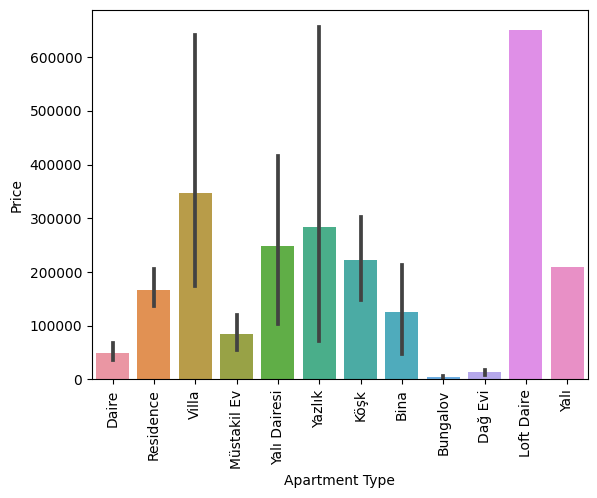

In [40]:
# plot the categorical columns
plot_categoricals(train, 'Apartment Type')

The bar chart compares the prices of various apartment types, showing that Loft Daire has the highest average price, followed by Villa and Yalı Dairesi, all with significant variability. In contrast, Daire, Müstakil Ev, Bina, Bungalow, and Dağ Evi are the more affordable options, with lower average prices and less variability. Villa, Yalı Dairesi, Yazlık, and Köşk exhibit a wide range of prices, indicating diverse pricing within these categories. Overall, the chart highlights the Loft Daire as the most expensive and Bungalow and Dağ Evi as the least expensive apartment types.

In [43]:
def plot_numerical(data, column):
    # create a histogram
    sns.histplot(data = data, x = column, kde = True)
    plt.show()

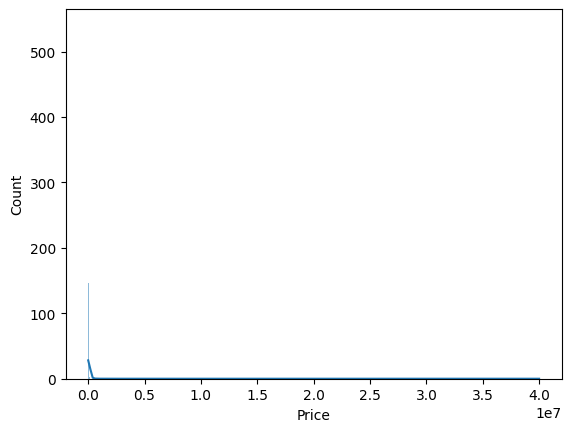

In [44]:
plot_numerical(train, 'Price')

In [45]:
train.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [65]:
# show unique values in House Age column
train['House Age'].unique()

array(['3', '5', 'Sıfır', '15', '10', '21', '1', '27', '25', '11', '22',
       '2', '4', '30', '26', '24', '55', '35', '9', '14', '6', '40', '31',
       '20', '8', '18', '12', '7', '39', '13', '45', '17', '50', '16',
       '36', '100', '75', '19', '43', '28', '37', '33', '38', '69', '42',
       '32', '29', '60', '34', '23', '48', '70', '52', '200', '80', '220',
       '95', '46', '65', '49'], dtype=object)

In [66]:
# replace 'Sıfır' with 0 and convert all values to integer
train['House Age'] = train['House Age'].replace('Sıfır', '0').astype(int)

In [67]:
train['House Age'].unique()

array([  3,   5,   0,  15,  10,  21,   1,  27,  25,  11,  22,   2,   4,
        30,  26,  24,  55,  35,   9,  14,   6,  40,  31,  20,   8,  18,
        12,   7,  39,  13,  45,  17,  50,  16,  36, 100,  75,  19,  43,
        28,  37,  33,  38,  69,  42,  32,  29,  60,  34,  23,  48,  70,
        52, 200,  80, 220,  95,  46,  65,  49])

In [68]:
# create my data copy 
train_copy = train.copy()

In [69]:
# show unique values in House Age column
train['Room Count'].unique()

array(['3 + 1', '4 + 1', '1 + 1', '2 + 1', '5 + 1', '5 + 2', '7 + 1',
       '6 + 1', '8 + 1', '6 + 2', '10 + 2', '8 + 2', '3 + 2', '7 + 2',
       '4 + 2', '1 + 0', '2 + 0', '2 + 2', '6 + 3', '11 + 2', '9 + 3',
       '6 + 6', '6 + 0', '9 + 1', '25 + 2', '4 + 8', '1 + 3', '3 + 3',
       '3 + 0', '4 + 4', '5 + 3', '1 + 2', '41 + 1', '9 + 2', '10 + 1'],
      dtype=object)

In [79]:
sample = train.head(10)
sample

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000
5,İstanbul,Beşiktaş,Levazım,Residence,Residence,10,175 m2,2 + 1,10. Kat,False,2.0,İkinci El,VRV,Doğalgaz,255000
6,Muğla,Bodrum,Dirmil,Villa,Villa,10,850 m2,4 + 1,NaN,True,4.0,İkinci El,Klima,Elektrik,1000000
7,İstanbul,Şişli,Fulya,Daire,Daire,21,80 m2,1 + 1,4. Kat,True,1.0,İkinci El,Kombi,Doğalgaz,35000
8,Antalya,Alanya,Mahmutlar,Daire,Daire,1,260 m2,5 + 1,En Üst Kat,False,3.0,İkinci El,Klima,Elektrik,25000
9,İstanbul,Beşiktaş,Etiler,Villa,Villa,27,500 m2,5 + 1,NaN,True,4.0,NaN,Kombi,Doğalgaz,500000


In [80]:
# replace room count values with integers: '3 + 1' = 4

# split the values using the '+' sign
# sample['Room Count'] = sample['Room Count'].str.split('+')
# int(sample['Room Count'].head(1)[0][0]) + int(sample['Room Count'].head(1)[0][1])

# create a function to convert the room count values to integers
def convert_room_count(data):
    data['Room Count'] = data['Room Count'].str.split('+')
    data['Room Count'] = data['Room Count'].apply(lambda x: int(x[0]) + int(x[1]))
    return data

convert_room_count(sample)
sample

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,4,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,4,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,360 m2,5,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,350 m2,5,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,2,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000
5,İstanbul,Beşiktaş,Levazım,Residence,Residence,10,175 m2,3,10. Kat,False,2.0,İkinci El,VRV,Doğalgaz,255000
6,Muğla,Bodrum,Dirmil,Villa,Villa,10,850 m2,5,NaN,True,4.0,İkinci El,Klima,Elektrik,1000000
7,İstanbul,Şişli,Fulya,Daire,Daire,21,80 m2,2,4. Kat,True,1.0,İkinci El,Kombi,Doğalgaz,35000
8,Antalya,Alanya,Mahmutlar,Daire,Daire,1,260 m2,6,En Üst Kat,False,3.0,İkinci El,Klima,Elektrik,25000
9,İstanbul,Beşiktaş,Etiler,Villa,Villa,27,500 m2,6,NaN,True,4.0,NaN,Kombi,Doğalgaz,500000


In [81]:
convert_room_count(train)
train.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,4,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,4,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,360 m2,5,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,350 m2,5,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,2,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [82]:
convert_room_count(test)
test.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,İstanbul,Beşiktaş,Ortaköy,Daire,Daire,32,500 m2,7,Villa Katı,False,5.0,İkinci El,Kombi,Doğalgaz,130000
1,İstanbul,Kağıthane,Şirintepe,Daire,Daire,Sıfır,60 m2,2,1. Kat,False,1.0,Sıfır,Kombi,Doğalgaz,14000
2,Isparta,Merkez,Karaağaç,Daire,Daire,20,125 m2,4,5. Kat,NaN,1.0,NaN,Kombi,NaN,14000
3,İstanbul,Beyoğlu,Hacıahmet,Daire,Daire,35,75 m2,2,4. Kat,True,1.0,NaN,Kombi,Doğalgaz,15000
4,İzmir,Karabağlar,Refet Bele,Daire,Daire,Sıfır,90 m2,3,Ara Kat,False,1.0,Sıfır,Kombi,Doğalgaz,18000


In [86]:
# replace Kat Karşılığı : with 1
# remove m2 from House Size column and conver to float
train['House Size'] = train['House Size'].str.replace('Kat Karşılığı :', '0')
train['House Size'] = train['House Size'].str.replace('m2', '').astype(float)
train.head()

,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125.0,4,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140.0,4,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,360.0,5,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,350.0,5,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,Daire,15,90.0,2,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000
